In [1]:
import os

base_dir = r"C:\Users\Pranav\Desktop\Glaucoma"
subfolders = ["Glaucoma_Train", "Glaucoma_Validation"]

for folder in subfolders:
    full_path = os.path.join(base_dir, folder)
    print(f"\n📁 Contents of: {folder}")
    
    for class_dir in os.listdir(full_path):
        class_path = os.path.join(full_path, class_dir)
        if os.path.isdir(class_path):
            files = os.listdir(class_path)
            print(f"  ├── Class: {class_dir} ({len(files)} images)")



📁 Contents of: Glaucoma_Train
  ├── Class: train (2 images)

📁 Contents of: Glaucoma_Validation
  ├── Class: validation (2 images)


In [2]:
import os

base_dir = r"C:\Users\Pranav\Desktop\Glaucoma"

def list_folder_structure(root_path):
    for split in ["Glaucoma_Train", "Glaucoma_Validation"]:
        split_path = os.path.join(root_path, split)
        print(f"\n📁 {split}:")

        if not os.path.exists(split_path):
            print("   (Path doesn't exist)")
            continue

        for subfolder in os.listdir(split_path):
            subfolder_path = os.path.join(split_path, subfolder)
            if os.path.isdir(subfolder_path):
                image_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                print(f"   ├── Class: {subfolder} ({len(image_files)} images)")
            else:
                print(f"   ├── {subfolder} (Not a folder)")

# Run it
list_folder_structure(base_dir)



📁 Glaucoma_Train:
   ├── Class: train (0 images)

📁 Glaucoma_Validation:
   ├── Class: validation (0 images)


In [11]:
import os

def count_images_in_folders(root_dir):
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            image_count = len([
                fname for fname in os.listdir(class_path)
                if fname.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            print(f"{class_name}: {image_count} images")

# Example usage:
root_train_dir = r"C:\Users\Pranav\Desktop\Glaucoma\Glaucoma_preprocessed\validation"
count_images_in_folders(root_train_dir)


glaucoma: 40 images
normal: 107 images


In [10]:
import os

def count_images_in_folders(root_dir):
    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            image_count = len([
                fname for fname in os.listdir(class_path)
                if fname.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            print(f"{class_name}: {image_count} images")

# Example usage:
root_train_dir = r"C:\Users\Pranav\Desktop\Glaucoma\Glaucoma_preprocessed\train"
count_images_in_folders(root_train_dir)


glaucoma: 528 images
normal: 1508 images


In [7]:
from PIL import Image
import os
from torchvision import transforms
from tqdm import tqdm

# Source and target
src_root = r"C:\Users\Pranav\Desktop\Glaucoma\validation"
dst_root = r"C:\Users\Pranav\Desktop\Glaucoma\Glaucoma_preprocessed\validation"

# Base preprocessing transform (resize + grayscale)
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1)
])

# Augmentation-only transform (excluding resize)
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.Grayscale(num_output_channels=1)
])

def preprocess_and_augment(src_dir, dst_dir, num_augments=3):
    os.makedirs(dst_dir, exist_ok=True)

    for img_name in tqdm(os.listdir(src_dir), desc=f"Processing {os.path.basename(src_dir)}"):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img_path = os.path.join(src_dir, img_name)
                img = Image.open(img_path).convert("RGB")

                # Apply base preprocessing and save original
                processed = base_transform(img)
                save_name = img_name.rsplit('.', 1)[0] + ".png"
                processed.save(os.path.join(dst_dir, save_name))

                # Create and save augmentations
                for i in range(num_augments):
                    aug_img = augmentation_transforms(img)
                    aug_name = img_name.rsplit('.', 1)[0] + f"_aug{i+1}.png"
                    aug_img.save(os.path.join(dst_dir, aug_name))

            except Exception as e:
                print(f"Error processing {img_name}: {e}")

# Run for both classes
for class_name in os.listdir(src_root):
    src_class_dir = os.path.join(src_root, class_name)
    dst_class_dir = os.path.join(dst_root, class_name)

    if os.path.isdir(src_class_dir):
        preprocess_and_augment(src_class_dir, dst_class_dir, num_augments=3)


Processing normal: 100%|█████████████████████████████████████████████████████████████| 107/107 [00:49<00:00,  2.16it/s]


In [8]:
from PIL import Image
import os
from torchvision import transforms
from tqdm import tqdm

# Source and target root directories
src_root = r"C:\Users\Pranav\Desktop\Glaucoma\validation"
dst_root = r"C:\Users\Pranav\Desktop\Glaucoma\Glaucoma_preprocessed\validation"

# Preprocessing transform (no augmentation!)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1)
])

def preprocess_validation_images(src_dir, dst_dir):
    os.makedirs(dst_dir, exist_ok=True)

    for img_name in tqdm(os.listdir(src_dir), desc=f"Processing {os.path.basename(src_dir)}"):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img_path = os.path.join(src_dir, img_name)
                img = Image.open(img_path).convert("RGB")
                processed = transform(img)

                save_name = img_name.rsplit('.', 1)[0] + ".png"
                processed.save(os.path.join(dst_dir, save_name))
            except Exception as e:
                print(f"Error processing {img_name}: {e}")

# Process both glaucoma and normal validation folders
for class_name in os.listdir(src_root):
    src_class_dir = os.path.join(src_root, class_name)
    dst_class_dir = os.path.join(dst_root, class_name)

    if os.path.isdir(src_class_dir):
        preprocess_validation_images(src_class_dir, dst_class_dir)


Processing normal: 100%|█████████████████████████████████████████████████████████████| 107/107 [00:11<00:00,  9.67it/s]


In [17]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Augmentations for training set


# Augmentations for training set
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# For validation (convert grayscale to RGB and normalize)
val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Repeat grayscale channel to RGB
    transforms.Resize((224, 224)),
    transforms.Normalize([0.5], [0.5])
])


# Dataset paths
train_dir = r"C:\Users\Pranav\Desktop\Glaucoma\Glaucoma_preprocessed\train"
val_dir = r"C:\Users\Pranav\Desktop\Glaucoma\Glaucoma_preprocessed\validation"

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Sanity check
print("Classes:", train_dataset.classes)
print("Training images:", len(train_dataset))
print("Validation images:", len(val_dataset))


Using device: cuda
Classes: ['glaucoma', 'normal']
Training images: 2036
Validation images: 147


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Hyperparameters
image_size = 224
batch_size = 16
nz = 100           # Latent vector (noise) size
num_classes = 2    # Normal, Glaucoma
embedding_dim = 100
num_epochs = 100   # You can reduce to test quicker
lr = 0.0002
beta1 = 0.5


Using device: cuda


In [8]:
image_size = 64
batch_size = 64  # You can go higher now

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

data_dir = r"C:\Users\Pranav\Desktop\Glaucoma\Glaucoma_preprocessed\train"
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)



In [9]:
class Generator(nn.Module):
    def __init__(self, nz, num_classes, embedding_dim):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, embedding_dim)

        self.net = nn.Sequential(
            nn.Linear(nz + embedding_dim, 256 * 8 * 8),
            nn.BatchNorm1d(256 * 8 * 8),
            nn.ReLU(True),

            nn.Unflatten(1, (256, 8, 8)),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 16x16
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # 32x32
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),     # 64x64
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_embedding = self.label_emb(labels)
        x = torch.cat([noise, label_embedding], dim=1)
        return self.net(x)


In [10]:
class Discriminator(nn.Module):
    def __init__(self, num_classes, embedding_dim):
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, embedding_dim)
        self.label_proj = nn.Linear(embedding_dim, 64 * 64)

        self.net = nn.Sequential(
            nn.Conv2d(2, 64, 4, 2, 1),  # 32x32
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1),  # 16x16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1),  # 8x8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            nn.Linear(256 * 8 * 8, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_embedding = self.label_emb(labels)
        label_map = self.label_proj(label_embedding).view(-1, 1, 64, 64)
        x = torch.cat([img, label_map], dim=1)
        return self.net(x)


In [11]:
G = Generator(nz, num_classes, embedding_dim).to(device)
D = Discriminator(num_classes, embedding_dim).to(device)


In [12]:
criterion = nn.BCELoss()

optimizerD = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999))


In [13]:
fixed_noise = torch.randn(num_classes, nz, device=device)
fixed_labels = torch.arange(0, num_classes, dtype=torch.long, device=device)

real_label = 1.0
fake_label = 0.0

for epoch in range(num_epochs):
    for i, (real_imgs, labels) in enumerate(dataloader):
        batch_size = real_imgs.size(0)

        ############################
        # (1) Train Discriminator
        ############################
        D.zero_grad()

        real_imgs = real_imgs.to(device)
        labels = labels.to(device)

        # Real images
        output_real = D(real_imgs, labels).view(-1)
        labels_real = torch.full((batch_size,), real_label, device=device)
        loss_real = criterion(output_real, labels_real)

        # Fake images
        noise = torch.randn(batch_size, nz, device=device)
        fake_imgs = G(noise, labels)
        output_fake = D(fake_imgs.detach(), labels).view(-1)
        labels_fake = torch.full((batch_size,), fake_label, device=device)
        loss_fake = criterion(output_fake, labels_fake)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizerD.step()

        ############################
        # (2) Train Generator
        ############################
        G.zero_grad()

        output = D(fake_imgs, labels).view(-1)
        loss_G = criterion(output, labels_real)
        loss_G.backward()
        optimizerG.step()

        if i % 50 == 0:
            print(f"[{epoch}/{num_epochs}][{i}/{len(dataloader)}] Loss_D: {loss_D.item():.4f} Loss_G: {loss_G.item():.4f}")

    # Save sample outputs
    with torch.no_grad():
        fake_imgs = G(fixed_noise, fixed_labels).detach().cpu()
    vutils.save_image(fake_imgs, f"epoch_{epoch}_cgan_samples.png", normalize=True, nrow=num_classes)


[0/100][0/32] Loss_D: 1.4779 Loss_G: 0.4537
[1/100][0/32] Loss_D: 0.0790 Loss_G: 3.8621
[2/100][0/32] Loss_D: 0.0181 Loss_G: 4.8924
[3/100][0/32] Loss_D: 0.0121 Loss_G: 5.7517
[4/100][0/32] Loss_D: 0.0036 Loss_G: 6.5664
[5/100][0/32] Loss_D: 0.0039 Loss_G: 6.2188
[6/100][0/32] Loss_D: 0.0012 Loss_G: 7.4783
[7/100][0/32] Loss_D: 0.0016 Loss_G: 6.8724
[8/100][0/32] Loss_D: 0.0014 Loss_G: 7.1278
[9/100][0/32] Loss_D: 0.0003 Loss_G: 8.5269
[10/100][0/32] Loss_D: 0.0009 Loss_G: 7.5254
[11/100][0/32] Loss_D: 0.0266 Loss_G: 5.9783
[12/100][0/32] Loss_D: 0.0004 Loss_G: 7.2197
[13/100][0/32] Loss_D: 0.3595 Loss_G: 4.6364
[14/100][0/32] Loss_D: 0.0287 Loss_G: 8.6762
[15/100][0/32] Loss_D: 0.0194 Loss_G: 6.5290
[16/100][0/32] Loss_D: 2.6141 Loss_G: 3.3875
[17/100][0/32] Loss_D: 0.1141 Loss_G: 4.7155
[18/100][0/32] Loss_D: 0.4635 Loss_G: 4.3090
[19/100][0/32] Loss_D: 0.5202 Loss_G: 6.4778
[20/100][0/32] Loss_D: 0.0897 Loss_G: 3.9611
[21/100][0/32] Loss_D: 0.1725 Loss_G: 5.4244
[22/100][0/32] Loss_

In [14]:
import torchvision.utils as vutils

# Create a fixed noise + labels for visualization
fixed_noise = torch.randn(num_classes, nz, device=device)
fixed_labels = torch.arange(0, num_classes, dtype=torch.long, device=device)
with torch.no_grad():
    fake_images = G(fixed_noise, fixed_labels).detach().cpu()
    vutils.save_image(fake_images, f"cgan_epoch_{epoch}.png", normalize=True, nrow=num_classes)


In [15]:
import os
os.getcwd()

'C:\\Users\\Pranav\\Desktop\\Glaucoma\\notebooks'

In [17]:
import numpy as np
import os
import cv2
import torch
import torchvision.utils as vutils
from torchvision.transforms.functional import to_pil_image
from PIL import Image

output_base = r"C:/Users/Pranav/Desktop/GAN_synthetic/train"
os.makedirs(os.path.join(output_base, "glaucoma"), exist_ok=True)
os.makedirs(os.path.join(output_base, "normal"), exist_ok=True)

def apply_clahe(tensor_img):
    img = to_pil_image(tensor_img)       # Tensor to PIL
    img = img.convert("L")               # Grayscale
    img_np = np.array(img)               # To NumPy
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(img_np)
    return Image.fromarray(enhanced)

G.eval()
num_images_per_class = 500
nz = 100

for class_label in [0, 1]:  # 0 = normal, 1 = glaucoma
    label_name = "normal" if class_label == 0 else "glaucoma"
    class_dir = os.path.join(output_base, label_name)

    for i in range(num_images_per_class):
        noise = torch.randn(1, nz, device=device)
        label_tensor = torch.tensor([class_label], device=device)
        fake_img = G(noise, label_tensor).detach().cpu().squeeze(0)

        enhanced_img = apply_clahe(fake_img)
        enhanced_img.save(os.path.join(class_dir, f"synth_{i}.png"))

    print(f"[✓] Saved {num_images_per_class} synthetic '{label_name}' images with CLAHE.")


[✓] Saved 500 synthetic 'normal' images with CLAHE.
[✓] Saved 500 synthetic 'glaucoma' images with CLAHE.


In [18]:
import os
import shutil

# Source directories
real_base = r"C:/Users/Pranav/Desktop/Glaucoma/Glaucoma_preprocessed/train"
gan_base  = r"C:/Users/Pranav/Desktop/GAN_synthetic/train"

# Target directory
final_base = r"C:/Users/Pranav/Desktop/final_train"
os.makedirs(final_base, exist_ok=True)

for cls in ['glaucoma', 'normal']:
    real_dir = os.path.join(real_base, cls)
    gan_dir  = os.path.join(gan_base, cls)
    final_dir = os.path.join(final_base, cls)
    os.makedirs(final_dir, exist_ok=True)

    # Copy real images
    for i, fname in enumerate(os.listdir(real_dir)):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            src = os.path.join(real_dir, fname)
            dst = os.path.join(final_dir, f"real_{i}.png")
            shutil.copy(src, dst)

    # Copy GAN images
    for i, fname in enumerate(os.listdir(gan_dir)):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            src = os.path.join(gan_dir, fname)
            dst = os.path.join(final_dir, f"synth_{i}.png")
            shutil.copy(src, dst)

    print(f"[✓] Merged {cls} images into: {final_dir}")


[✓] Merged glaucoma images into: C:/Users/Pranav/Desktop/final_train\glaucoma
[✓] Merged normal images into: C:/Users/Pranav/Desktop/final_train\normal


In [28]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),  # Convert to tensor first
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.Normalize([0.5], [0.5])
])


In [29]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_dir = r"C:/Users/Pranav/Desktop/final_train"

train_dataset = ImageFolder(root=train_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print("Classes:", train_dataset.classes)
print("Total training images:", len(train_dataset))

Classes: ['glaucoma', 'normal']
Total training images: 3036


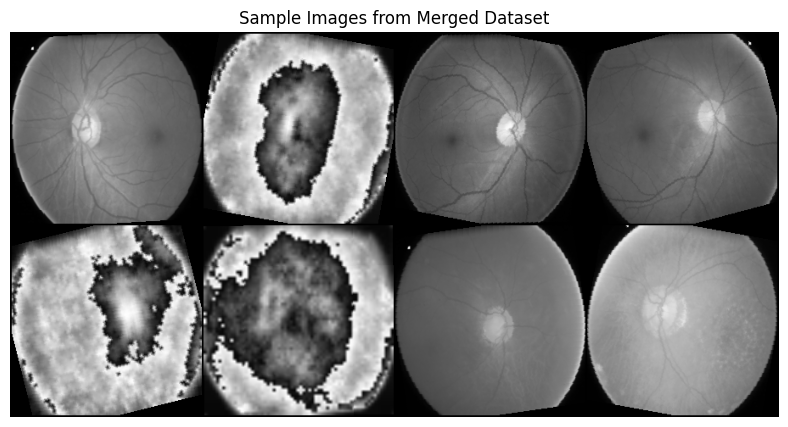

In [30]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

images, labels = next(iter(train_loader))
grid = vutils.make_grid(images[:8], normalize=True, nrow=4)

plt.figure(figsize=(10, 5))
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.title('Sample Images from Merged Dataset')
plt.show()

In [1]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet50
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# Modify final FC layer to output 2 classes
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)


In [2]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [7]:
num_epochs = 10  # Start small

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    accuracy = correct / len(train_loader.dataset)

    print(f"[{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f} | Accuracy: {accuracy*100:.2f}%")


[1/10] Loss: 0.3787 | Accuracy: 83.33%
[2/10] Loss: 0.2475 | Accuracy: 89.99%
[3/10] Loss: 0.1601 | Accuracy: 93.81%
[4/10] Loss: 0.1208 | Accuracy: 95.69%
[5/10] Loss: 0.1032 | Accuracy: 96.38%
[6/10] Loss: 0.0750 | Accuracy: 97.13%
[7/10] Loss: 0.0492 | Accuracy: 98.32%
[8/10] Loss: 0.0602 | Accuracy: 97.73%
[9/10] Loss: 0.0573 | Accuracy: 98.16%
[10/10] Loss: 0.0387 | Accuracy: 98.65%


In [4]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [5]:
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.Normalize([0.5], [0.5])
])

train_dir = r"C:/Users/Pranav/Desktop/final_train"
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


In [6]:
from torchvision import models
import torch.nn as nn

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [8]:
val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Resize((224, 224)),
    transforms.Normalize([0.5], [0.5])
])

val_dir = r"C:/Users/Pranav/Desktop/Glaucoma/Glaucoma_preprocessed/validation"
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print("Validation images:", len(val_dataset))
print("Classes:", val_dataset.classes)


Validation images: 147
Classes: ['glaucoma', 'normal']


In [9]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    print(f"✅ Validation Accuracy: {accuracy * 100:.2f}%")


In [10]:
evaluate(model, val_loader)


✅ Validation Accuracy: 97.28%


In [11]:
def evaluate_with_loss(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    print(f"✅ Validation Loss: {avg_loss:.4f} | Accuracy: {accuracy * 100:.2f}%")


In [12]:
evaluate_with_loss(model, val_loader, criterion)


✅ Validation Loss: 0.0943 | Accuracy: 97.28%


In [13]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

def test_random_samples(model, dataset, num_samples=10):
    model.eval()
    indices = torch.randperm(len(dataset))[:num_samples]

    plt.figure(figsize=(15, 6))

    for i, idx in enumerate(indices):
        img, label = dataset[idx]
        input_img = img.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_img)
            probs = F.softmax(output, dim=1)
            pred = torch.argmax(probs, dim=1).item()
            confidence = probs[0][pred].item()

        true_label = dataset.classes[label]
        pred_label = dataset.classes[pred]

        plt.subplot(2, 5, i+1)
        plt.imshow(img.permute(1, 2, 0).squeeze(), cmap='gray')
        plt.axis('off')
        title = f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}"
        plt.title(title, fontsize=9)

    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.9764706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.99215686].
Cl

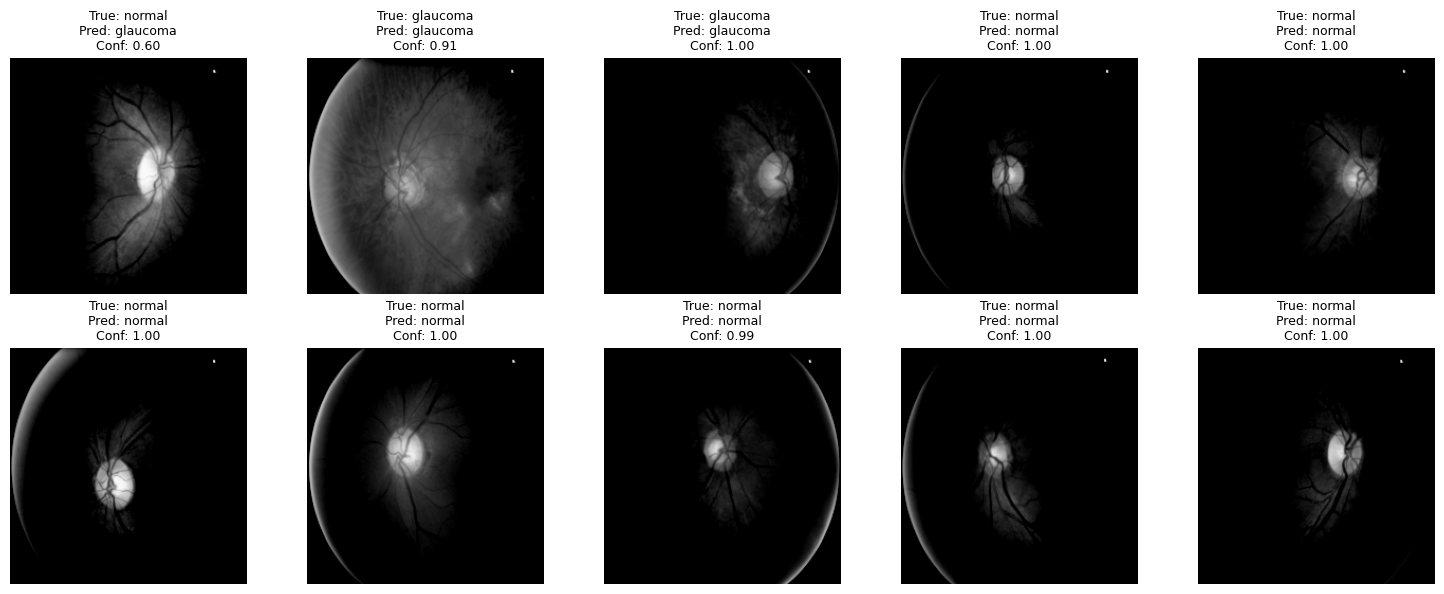

In [14]:
test_random_samples(model, val_dataset, num_samples=10)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

def evaluate_full_metrics(model, loader, class_names):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            probs = F.softmax(outputs, dim=1)

            preds = torch.argmax(probs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs[:, 1].cpu().numpy())  # Probability for class 1 (glaucoma)
            all_labels.extend(labels.cpu().numpy())

    print("🔍 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("🧠 Confusion Matrix")
    plt.show()

    auc = roc_auc_score(all_labels, all_probs)
    fpr, tpr, _ = roc_curve(all_labels, all_probs)

    print(f"✅ AUC-ROC: {auc:.4f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("🔥 ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


🔍 Classification Report:
              precision    recall  f1-score   support

    glaucoma       0.91      1.00      0.95        40
      normal       1.00      0.96      0.98       107

    accuracy                           0.97       147
   macro avg       0.95      0.98      0.97       147
weighted avg       0.98      0.97      0.97       147



C:\Users\Pranav\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


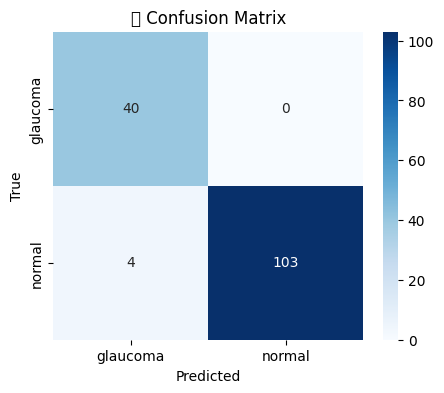

✅ AUC-ROC: 0.9967


C:\Users\Pranav\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


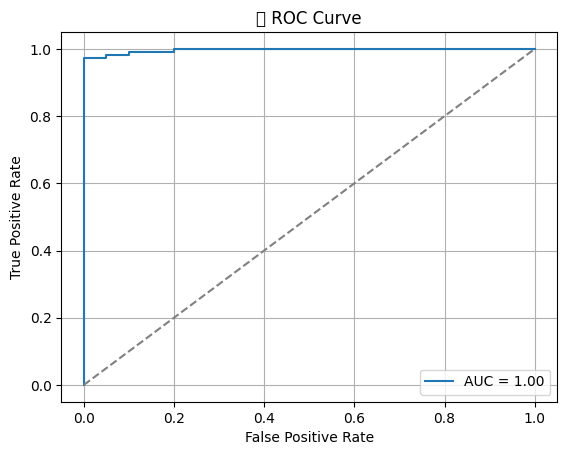

In [16]:
evaluate_full_metrics(model, val_loader, class_names=val_dataset.classes)


In [17]:
torch.save(model.state_dict(), "model.pth")

In [18]:
import os
print(os.getcwd())


C:\Users\Pranav\Desktop\Glaucoma\notebooks


In [19]:
print(val_dataset.classes)


['glaucoma', 'normal']
